In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Salary_Data.csv")
df.head(10)

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


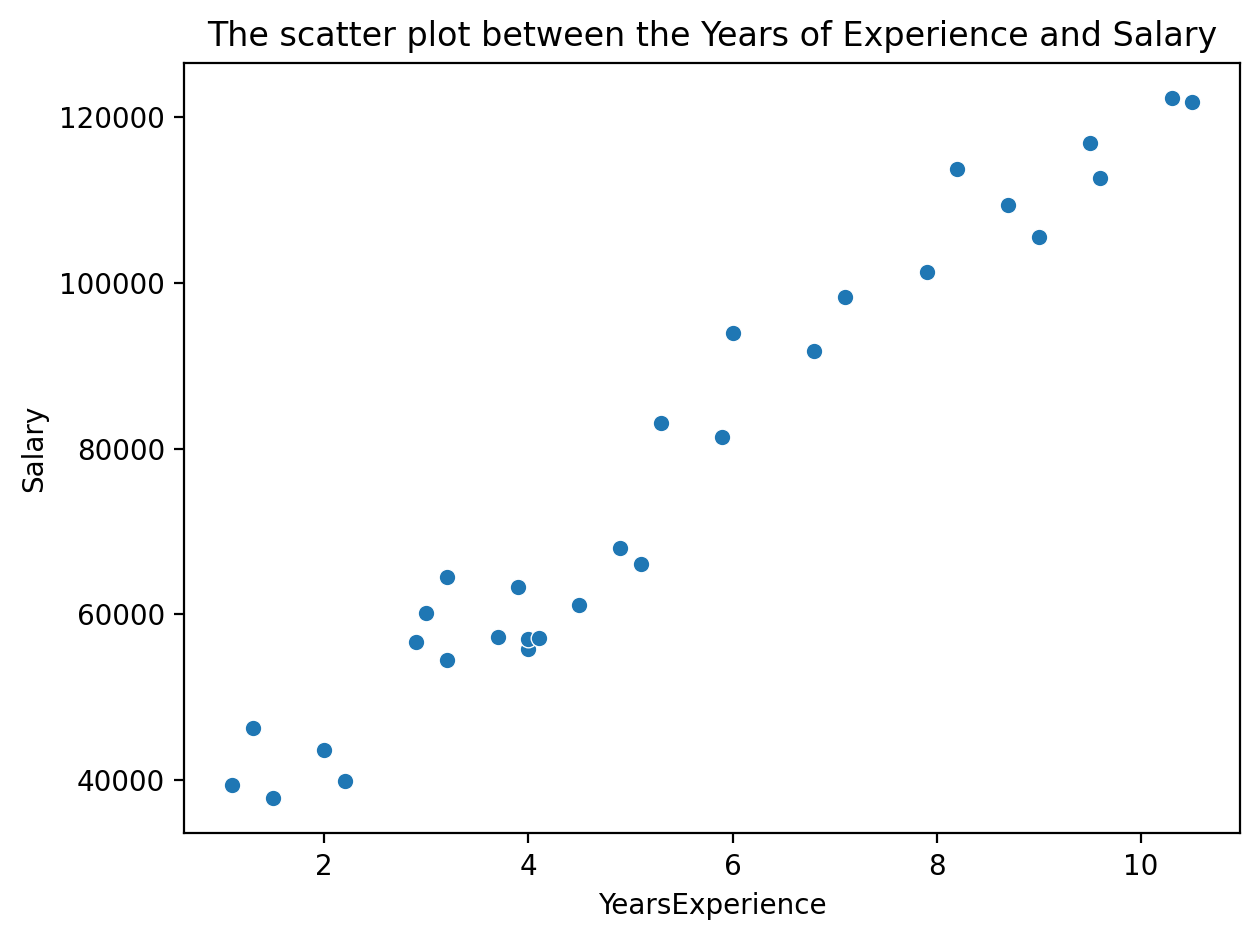

the scatter plot is in the linear and positive


In [4]:
fig=plt.figure(dpi=200)
sns.scatterplot(x=df["YearsExperience"],y=df["Salary"])
plt.title("The scatter plot between the Years of Experience and Salary")
plt.tight_layout()
plt.show()
print("the scatter plot is in the linear and positive")

<Axes: xlabel='YearsExperience', ylabel='Salary'>

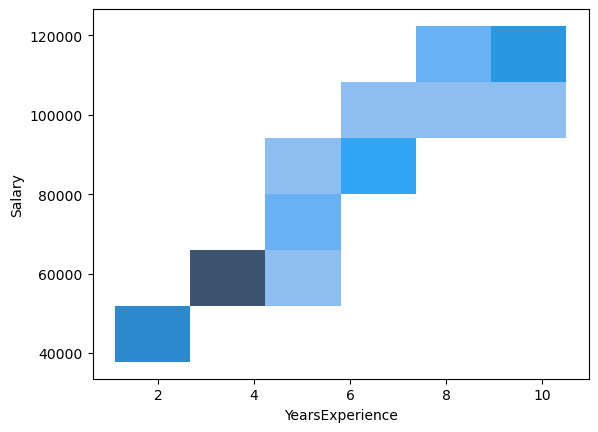

In [5]:
sns.histplot(x="YearsExperience",y="Salary",data=df)

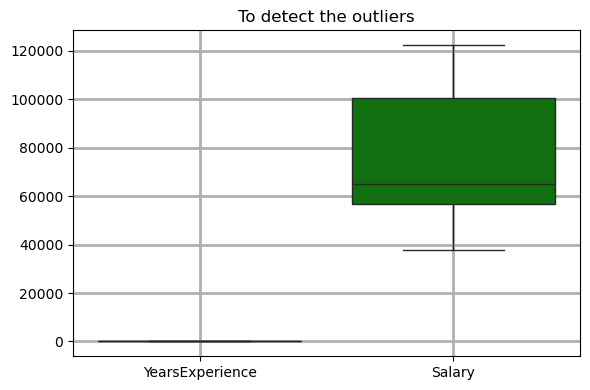

There is no outliers in the given data so now we can able to proceed to the next step


In [6]:
fig=plt.figure(figsize=(6,4))
# plt.style.use('fivethirtyeight')
sns.boxplot(data=df,palette=["red","green"])
plt.title("To detect the outliers")
plt.grid(linewidth=2)
plt.tight_layout()
plt.show()
print("There is no outliers in the given data so now we can able to proceed to the next step")

In [7]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [9]:
# Splitting the data into depending and independent variable
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [10]:
inp=df[["YearsExperience"]]
out=df["Salary"]

In [107]:
inp_train,inp_test,out_train,out_test=train_test_split(inp,out,test_size=0.5,random_state=2)

In [109]:
linear=LinearRegression()
linear.fit(inp_train,out_train)

LinearRegression()

In [111]:
linear.intercept_

23893.05308831622

In [113]:
linear.coef_

array([9528.09026504])

In [115]:
out_pred=linear.predict(inp_test)

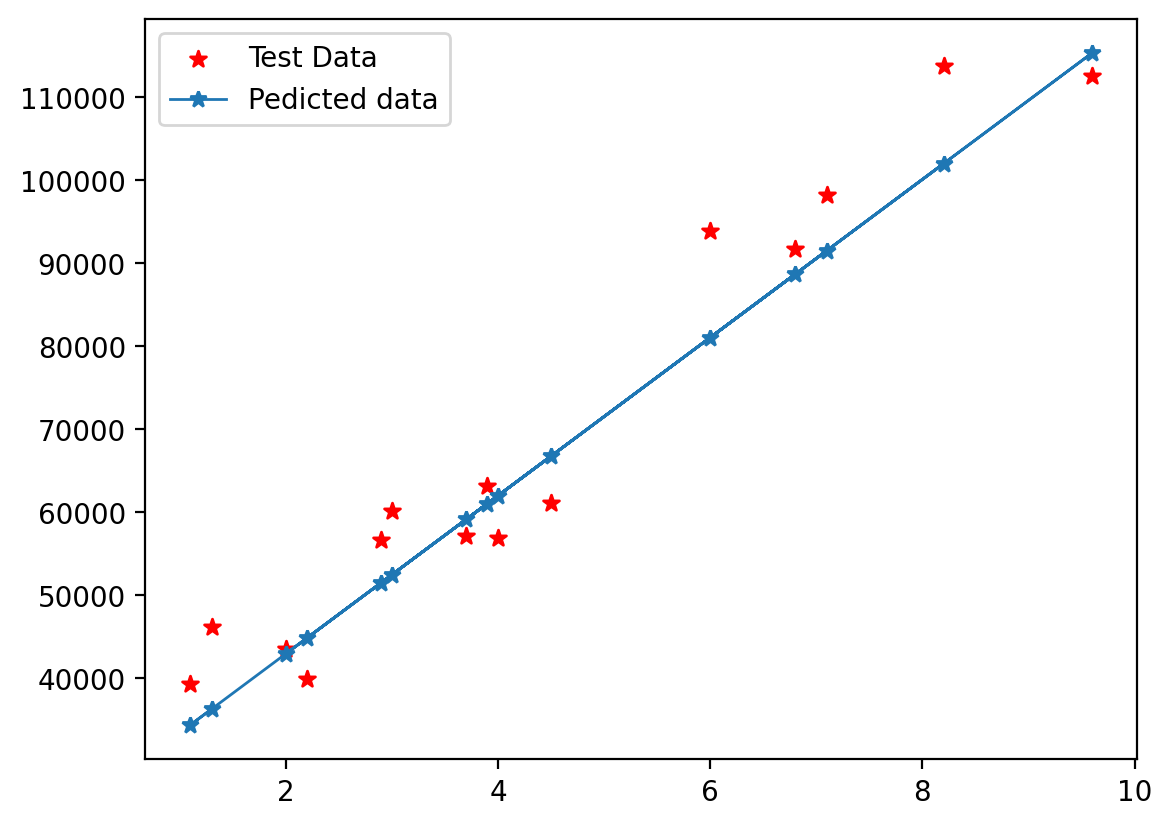

In [117]:
fig=plt.figure(dpi=200)
plt.scatter(x=inp_test,y=out_test,marker="*",color="red",label="Test Data")
plt.plot(inp_test,out_pred,marker="*",linewidth=1,label="Pedicted data")
plt.legend()
plt.show()

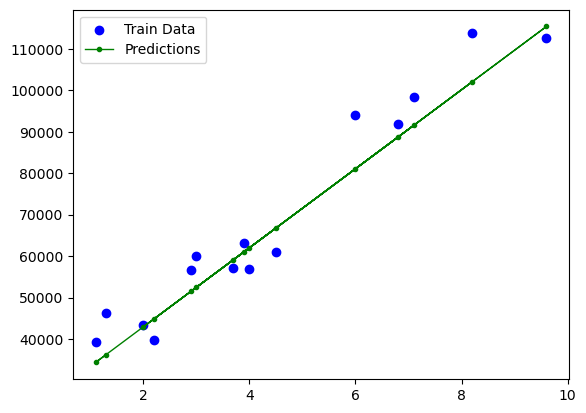

In [119]:
plt.scatter(inp_test, out_test, label="Train Data", color='blue')
plt.plot(inp_test, out_pred, label="Predictions", color='g',linewidth=1,marker=".")  # out_pred from model.predict()
plt.legend()
plt.show()

In [121]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score

In [123]:
MAE=mean_absolute_error(out_test,out_pred)
r2=r2_score(out_test,out_pred)
MSE=mean_squared_error(out_test,out_pred)
print("th average difference between the predict error and actual error:",round(MAE,2))
print("The data values are the inter likinked to each other:",round(r2,4))
print("The squared difference between the values:",round(MSE,2))

th average difference between the predict error and actual error: 5682.25
The data values are the inter likinked to each other: 0.9292
The squared difference between the values: 44410271.37


In [125]:
out_test.info()

<class 'pandas.core.series.Series'>
Index: 15 entries, 1 to 10
Series name: Salary
Non-Null Count  Dtype
--------------  -----
15 non-null     int64
dtypes: int64(1)
memory usage: 240.0 bytes


In [129]:
value=float(input("Enter the no of years to guess the salary:"))
test=linear.predict([[value]])
print(test)

Enter the no of years to guess the salary: 2


[42949.2336184]


numpy.ndarray

43525